In [1]:
# for Quandl installaiton in your kernel
!pip install Quandl


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from sklearn.linear_model import LinearRegression
from pandas_profiling import ProfileReport
import seaborn as sns

Using Quandl api we fetch TCS stock data of 1 Month for our predicition

In [2]:
quandl.ApiConfig.api_key = "x6fVzQf8o1joCSyhKBoY"
stock_data = quandl.get('NSE/TCS',start_date ='2018-12-01',end_date='2018-12-31')
# let's see the data
print(stock_data)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2018-12-03  1984.00  1990.00  1968.30  1984.00  1982.40             1610576.0   
2018-12-04  1983.00  2019.40  1971.00  2009.85  2010.85             3270615.0   
2018-12-05  2006.00  2018.00  1985.00  2003.90  2006.75             2501539.0   
2018-12-06  1998.00  2017.00  1979.60  1990.00  1992.70             2321216.0   
2018-12-07  1985.05  2003.90  1973.00  1999.85  1995.20             1680420.0   
2018-12-10  1975.00  2011.00  1960.00  1961.00  1975.80             2010786.0   
2018-12-11  1970.00  2010.00  1961.00  1997.05  2000.00             2942014.0   
2018-12-12  2001.10  2022.00  1984.95  2016.50  2016.80             2219993.0   
2018-12-13  2024.00  2029.70  1974.50  1981.95  1982.60             3748429.0   
2018-12-14  1983.00  1998.95  1975.25  1989.00  1989.75             2473761.0   
2018-12-17  1999.00  2004.90

In [3]:
# using the pandas lib we have just convert this data into Dataframe
dataset = pd.DataFrame(stock_data)

In [4]:
dataset.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


* Now we convert into csv format

In [5]:
dataset.to_csv("TCS.csv")

In [6]:
# now call the csv file 
data = pd.read_csv("TCS.csv")

In [7]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [8]:
# let check the null value
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
ProfileReport(data)

In [10]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total_Trade_Quantity    float64
Turnover_(Lacs)         float64
dtype: object

###### As we see the Pearsonp's r graph so we observe that this variable are higly correalation to each other

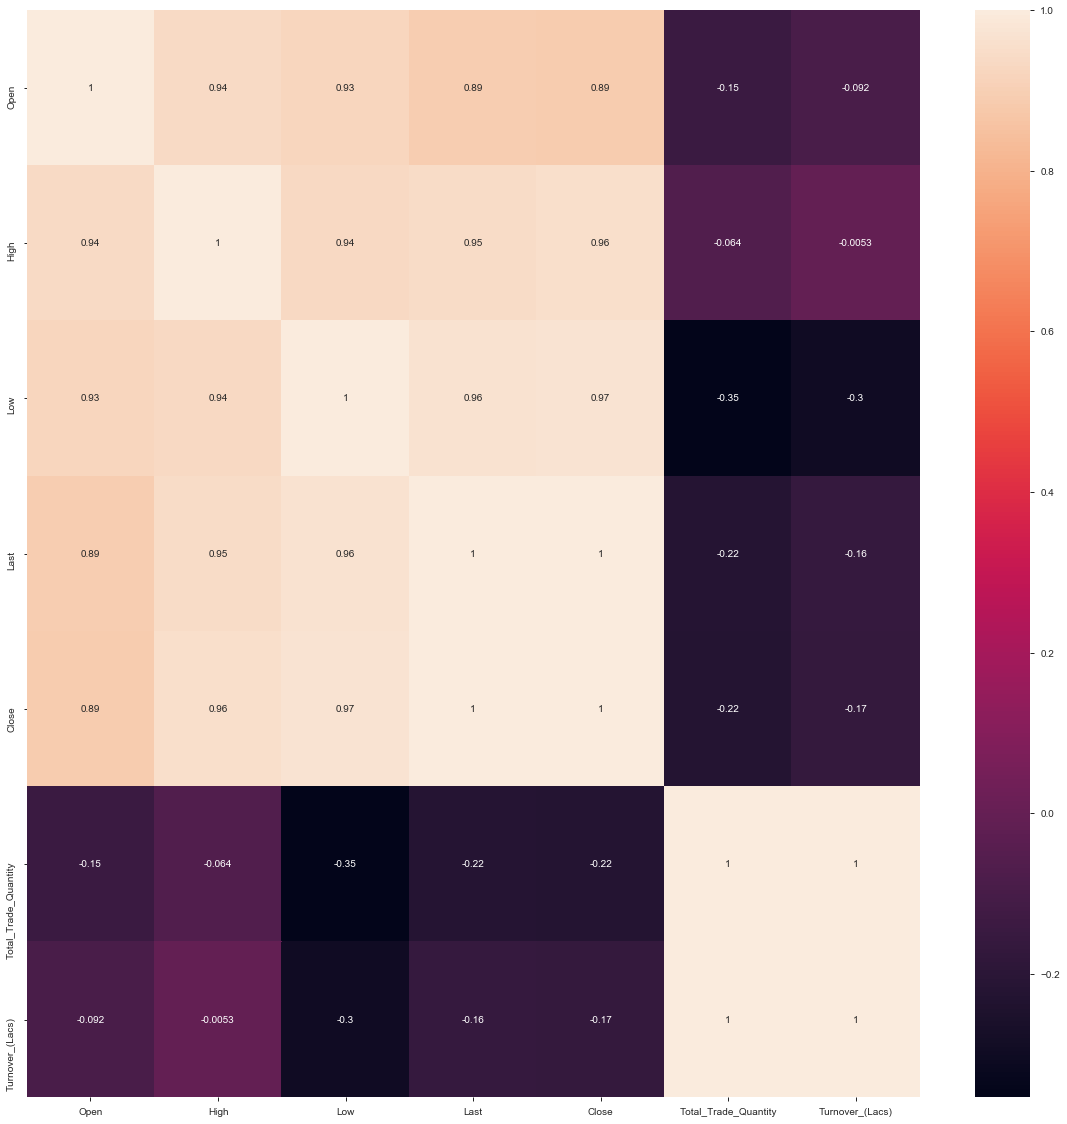

In [11]:
# or we use the seaborn lib :
plt.figure(1, figsize=(20,20))
cor = sns.heatmap(data.corr(), annot=True)

* for prediction we have to divide data in Dependent and Independent     variable
* we divide a data in "label--y" and "features----x"

In [12]:
x = data.loc[:,"High":"Turnover_(Lacs)"] # select all row and then col from high to turnover
y = data.loc[:,"Open"]

In [13]:
data.head()

,Date,Open,High,Low,Last,Close,Total_Trade_Quantity,Turnover_(Lacs)
0,2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [14]:
x.head()

,High,Low,Last,Close,Total_Trade_Quantity,Turnover_(Lacs)
0,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [15]:
y.head()

0    1984.00
1    1983.00
2    2006.00
3    1998.00
4    1985.05
Name: Open, dtype: float64

###### Now we have to split data in train and test 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)
# 1 % for testing and 99% training

##### let's fit our LinearRegression model

In [18]:
LR = LinearRegression()

In [19]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
LR.score(x_test,y_test)   # here we get 99% accuracy

0.99976474840472

#### Now i given a test data of random day

In [21]:
Test_data = [[2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71]]
predicition = LR.predict(Test_data)

In [22]:
print(predicition)

[2001.75159573]


## on that day tcs open 1998.0 and our model predicted price is 2001.75 so we can near to the prediciton

In [23]:
Test_data1 = [[1910.00,1885.0,1905.9,1902.80,1094883.0,20800.34]]
prediction = LR.predict(Test_data1)

In [24]:
print(prediction)

[1888.26724317]


## Conclusion
Refer to the "Refer_DataSet.ipyb" file here our prediciton was 1888.26 and original predicition is 1896 so we are very close